In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Importing libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import mode
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
# Suppress scikit-learn warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Reading dataset

In [7]:
data = pd.read_csv(r'V:\The AI health Bot\notebook\dataset\female.csv')


In [8]:
data.head()


,disease,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,Alzheimer's disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,HIV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pneumocystis carinii pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,accident cerebrovascular,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,acquired immuno-deficiency syndrome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data

,disease,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,Alzheimer's disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,HIV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pneumocystis carinii pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,accident cerebrovascular,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,acquired immuno-deficiency syndrome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,tonic-clonic seizures,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,transient ischemic attack,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,tricuspid valve insufficiency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,ulcer peptic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
shortness of breath,149.0,0.006711,0.081923,0.0,0.0,0.0,0.0,1.0
dizziness,149.0,0.006711,0.081923,0.0,0.0,0.0,0.0,1.0
asthenia,149.0,0.020134,0.140933,0.0,0.0,0.0,0.0,1.0
fall,149.0,0.006711,0.081923,0.0,0.0,0.0,0.0,1.0
syncope,149.0,0.013423,0.115465,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
air fluid level,149.0,0.020134,0.140933,0.0,0.0,0.0,0.0,1.0
catching breath,149.0,0.073826,0.262369,0.0,0.0,0.0,0.0,1.0
large-for-dates fetus,149.0,0.026846,0.162177,0.0,0.0,0.0,0.0,1.0
immobile,149.0,0.080537,0.273040,0.0,0.0,0.0,0.0,1.0


In [11]:
data.isnull().sum()

disease                  0
shortness of breath      0
dizziness                0
asthenia                 0
fall                     0
                        ..
air fluid level          0
catching breath          0
large-for-dates fetus    0
immobile                 0
homicidal thoughts       0
Length: 405, dtype: int64

In [12]:
data.dropna(axis=1,inplace=True)

In [16]:
data_input = data.drop(columns=['prognosis'])
data_output = data['prognosis']

KeyError: "['prognosis'] not found in axis"

In [ ]:
data['prognosis'].value_counts()

# Splitting dataset into training, validation, and test sets

In [10]:


from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

print('X_train.shape =', X_train.shape)
print('y_train.shape =', y_train.shape)
print('-------------------------------')
print('X_val =', X_val.shape)
print('y_val.shape =', y_val.shape)
print('-------------------------------')
print('X_test =', X_test.shape)
print('y_test.shape =', y_test.shape)

X_train.shape = (2410, 132)
y_train.shape = (2410,)
-------------------------------
X_val = (1034, 132)
y_val.shape = (1034,)
-------------------------------
X_test = (1476, 132)
y_test.shape = (1476,)


In [11]:
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

# KNN Training and Validation

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 20)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [13]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)

print('accuracy_train =', accuracy_train)
print('accuracy_val =', accuracy_val)

accuracy_train = 1.0
accuracy_val = 1.0


# Final Test

In [14]:
best_model = KNeighborsClassifier(n_neighbors=10, weights='uniform')
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(accuracy_test)

1.0


## DecisionTree

#  Training and validation (model selection)
We train the model using X_train and validate it using X_val. For example let's create a decision tree with max_depth=3.

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier(max_depth=3, random_state=2)

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [20]:
print('Training accuracy =', accuracy_score(y_train, y_pred_train))
print('Validation accuracy =', accuracy_score(y_val, y_pred_val))

Training accuracy = 0.10995850622406639
Validation accuracy = 0.07833655705996131


## Try changing the model hyper-parameters (such as max_depth) and keep repeating the training and validation process until you achieve a good validation accuracy value

In [21]:
# we are going to try these values
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8]

# we store the accuracy values of our experiments in two lists 
# (for training and validation)
training_accuracy_values = []
validation_accuracy_values = []

# we loop over the max_depth_values
for max_depth_val in max_depth_values:
    
    # create the model
    model = DecisionTreeClassifier(max_depth=max_depth_val, 
                                   random_state=2)
    
    # train the model
    model.fit(X_train, y_train)
    
    # calculate the training and validation accuracy
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    
    # add these results to the lists
    training_accuracy_values.append(acc_train)
    validation_accuracy_values.append(acc_val)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

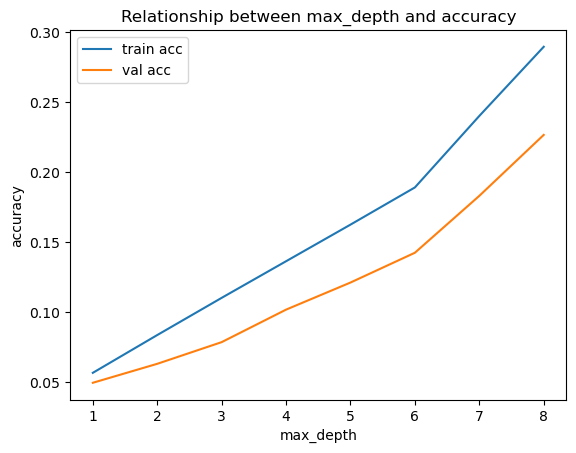

In [23]:
plt.plot(max_depth_values, training_accuracy_values, label="train acc")
plt.plot(max_depth_values, validation_accuracy_values, label="val acc")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Relationship between max_depth and accuracy')
plt.legend()
plt.show()

The previous plot shows that the best result is achieved when max_depth=3. As the max_depth increases, the validation accuracy becomes low compared to training accuracy. This is known as "overfitting".

So the best model has max_depth=3:

In [24]:
model_best = DecisionTreeClassifier(max_depth=45, random_state=2)
model_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=45, random_state=2)

#  Testing
After we select the final model, we test it using the un-seen test data. 

**Warning:** After we test the model, we are not allowed to modify it and test it again using the same data!

In [25]:
y_pred_test = model_best.predict(X_test)

In [26]:
print('Test accuracy:', accuracy_score(y_test, y_pred_test))

Test accuracy: 0.9850948509485095


In [27]:
import joblib
joblib.dump(model_best,"knn_clf.joblib")

['knn_clf.joblib']